In [1]:
from ode_functions import fun, plot_time_series, plot_projections, ic_function, convert_to_dict_2
import scipy.integrate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
#Import bottom black wall parameters
params = pd.read_csv("Parameter_datasets/P1BBW50Nodes.csv", header = None)#csv is 50 parameter sets, each as a row
params = convert_to_dict_2(params)

In [3]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [4]:
#list of 10 initial conditions. 
#set seed to 0 so that the randomly 
#chosen initial conditions are always the same
random.seed(0) 
ICs = [ic_function('111',params[0]) for i in range(10)]

In [5]:
#parameter index for large orbit and small orbit
large_index = 0
small_index = 3
print('large: ',params[large_index],'\n')
print('small: ',params[small_index])

large:  {'LMcMc': 0.5, 'LMcP': 2.75, 'LMcPT': 1.0, 'LMnMc': 0.4375, 'LMnP': 0.875, 'LPMn': 0.5, 'thetaMcMc': 1.0, 'thetaMcP': 1.5, 'thetaMcPT': 2.5, 'thetaMnMc': 1.5, 'thetaPMn': 0.6015625, 'UMcMc': 1.0, 'UMcP': 4.0, 'UMcPT': 2.0, 'UMnMc': 0.875, 'UMnP': 1.0, 'UPMn': 3.5} 

small:  {'LMcMc': 0.5, 'LMcP': 2.0, 'LMcPT': 0.5, 'LMnMc': 0.875, 'LMnP': 0.875, 'LPMn': 0.5, 'thetaMcMc': 1.25, 'thetaMcP': 1.0, 'thetaMcPT': 1.5, 'thetaMnMc': 1.375, 'thetaPMn': 0.84765625, 'UMcMc': 1.0, 'UMcP': 4.0, 'UMcPT': 1.0, 'UMnMc': 1.0, 'UMnP': 0.9375, 'UPMn': 2.5}


## Large Solutions

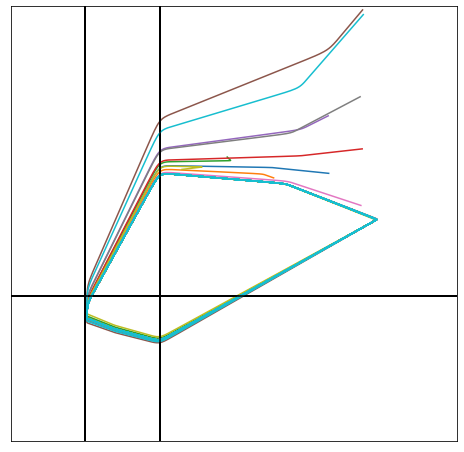

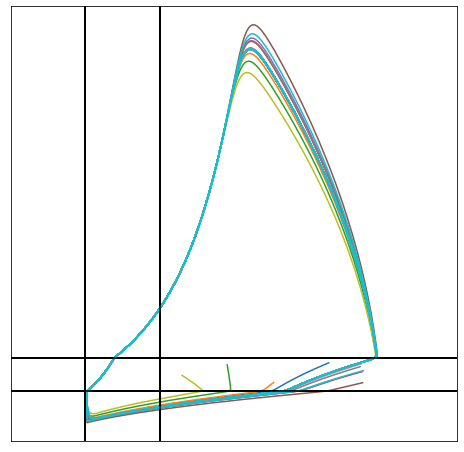

In [6]:
#plot large solutions in phase space
fig1,ax1 = plt.subplots(1,1,figsize = (8,8))
fig2,ax2 = plt.subplots(1,1,figsize = (8,8))
ax1.set_xlim(0.5,3.5)
ax1.set_ylim(.3,1.2)
ax2.set_xlim(0.5,3.5)
ax2.set_ylim(0,13)
for ic in ICs:
    large_sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,params[large_index],n,decays),[0,tf],y0 = ic,method = 'BDF',rtol = 1e-5,atol = 1e-8)
    plot_projections(large_sol,params[large_index],axs = (ax1,ax2),make_ticks = False,label = False)

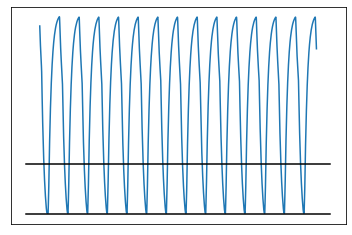

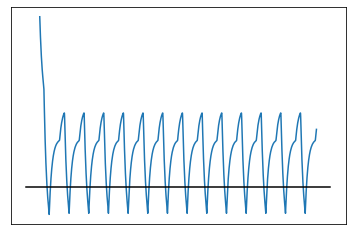

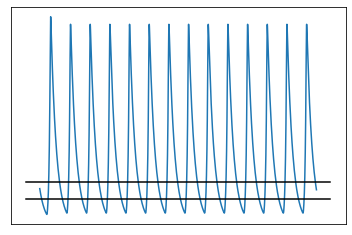

In [7]:
#plot large solutions in time series
fig1,ax1 = plt.subplots(1,1,figsize = (6,4))
fig2,ax2 = plt.subplots(1,1,figsize = (6,4))
fig3,ax3 = plt.subplots(1,1,figsize = (6,4))
plot_time_series(large_sol,params[large_index],axs = (ax1,ax2,ax3),make_ticks = False,label = False)

# Small Solutions

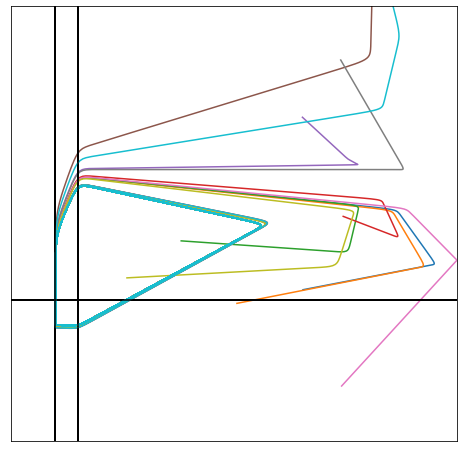

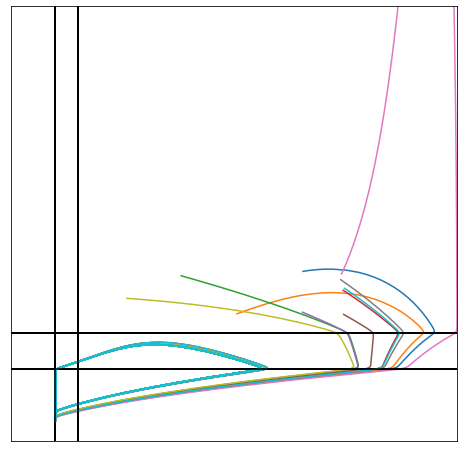

In [8]:
#plot small solutions in phase space
fig1,ax1 = plt.subplots(1,1,figsize = (8,8))
fig2,ax2 = plt.subplots(1,1,figsize = (8,8))
ax1.set_xlim(1,3.5)
ax1.set_ylim(.75,1.05)
ax2.set_xlim(1,3.5)
ax2.set_ylim(0,6)
for ic in ICs:
    small_sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,params[small_index],n,decays),[0,tf],y0 = ic,method = 'BDF',rtol = 1e-5,atol = 1e-8)
    plot_projections(small_sol,params[small_index],axs = (ax1,ax2),make_ticks = False,label = False)


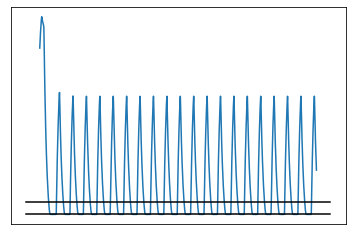

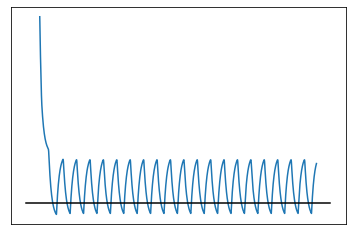

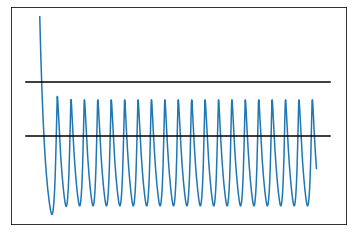

In [9]:
#plot small solutions in time series
fig1,ax1 = plt.subplots(1,1,figsize = (6,4))
fig2,ax2 = plt.subplots(1,1,figsize = (6,4))
fig3,ax3 = plt.subplots(1,1,figsize = (6,4))
plot_time_series(small_sol,params[small_index],axs = (ax1,ax2,ax3),make_ticks = False,label = False)